In [ ]:
__author__ = "Alireza Sadabadi"
__copyright__ = "Copyright (c) 2025 Alireza Sadabadi. All rights reserved."
__credits__ = ["Alireza Sadabadi"]
__license__ = "Apache"
__version__ = "2.0"
__maintainer__ = "Alireza Sadabadi"
__email__ = "alirezasadabady@gmail.com"
__status__ = "Test"
__doc__ = "you can see the tutorials in https://youtube.com/@alirezasadabadi?si=d8o7LK_Ai1Hf68is"

In [13]:
import pandas as pd
df = pd.read_csv("EURUSDH1.csv")
df=df.loc[:,['time', 'open', 'high', 'low', 'close']]
df.reset_index(drop=True, inplace=True)
print(df.isna().sum())
df

time     0
open     0
high     0
low      0
close    0
dtype: int64


,time,open,high,low,close
0,2023-12-07 02:00:00,1.07667,1.07722,1.07656,1.07688
1,2023-12-07 03:00:00,1.07687,1.07713,1.07643,1.07673
2,2023-12-07 04:00:00,1.07673,1.07709,1.07620,1.07649
3,2023-12-07 05:00:00,1.07650,1.07655,1.07594,1.07598
4,2023-12-07 06:00:00,1.07597,1.07627,1.07580,1.07606
...,...,...,...,...,...
9995,2025-07-18 19:00:00,1.16442,1.16482,1.16260,1.16281
9996,2025-07-18 20:00:00,1.16281,1.16292,1.16174,1.16264
9997,2025-07-18 21:00:00,1.16265,1.16275,1.16188,1.16211
9998,2025-07-18 22:00:00,1.16211,1.16225,1.16166,1.16218


In [21]:
def GetPivots(df1, cc, before, after):
    if cc-before < 0 or cc+after >= len(df1):
        return 0
    
    pivotLow=1
    pivotHigh=1
    for i in range(cc-before, cc+after+1):
        if(df1.low[cc]>df1.low[i]):
            pivotLow=0
        if(df1.high[cc]<df1.high[i]):
            pivotHigh=0
    if pivotLow and pivotHigh:
        return 5
    elif pivotLow:
        return 1
    elif pivotHigh:
        return 2
    else:
        return 0
    
df['pivot'] = df.apply(lambda row: GetPivots(df, row.name,10,10), axis=1)

In [22]:
df.value_counts('pivot')

pivot
0    9324
2     346
1     327
5       3
Name: count, dtype: int64

In [23]:
import numpy as np
def PointPositions(x):
    if x['pivot']==1:
        return x['low']-1e-3
    elif x['pivot']==2:
        return x['high']+1e-3
    else:
        return np.nan

df['point_position'] = df.apply(lambda row: PointPositions(row), axis=1)

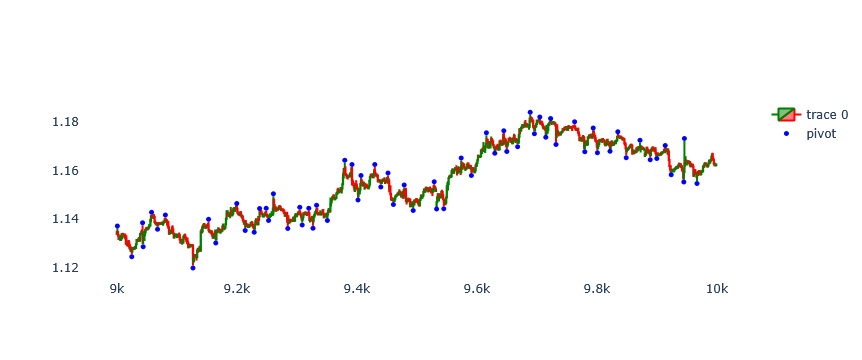

In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
df4plot = df[-1000:]
figure = go.Figure(data=[go.Candlestick(x=df4plot.index,
                open=df4plot['open'],
                high=df4plot['high'],
                low=df4plot['low'],
                close=df4plot['close'],
                increasing_line_color= 'green', 
                decreasing_line_color= 'red')])

figure.add_scatter(x=df4plot.index,
                y=df4plot['point_position'],
                mode="markers",
                marker=dict(size=5, color="Blue"),
                name="pivot")
figure.update_layout(xaxis_rangeslider_visible=False)
figure.update_yaxes(showgrid=False)
figure.update_xaxes(showgrid=False)
figure.update_layout(paper_bgcolor='white', plot_bgcolor='white')

figure.show()

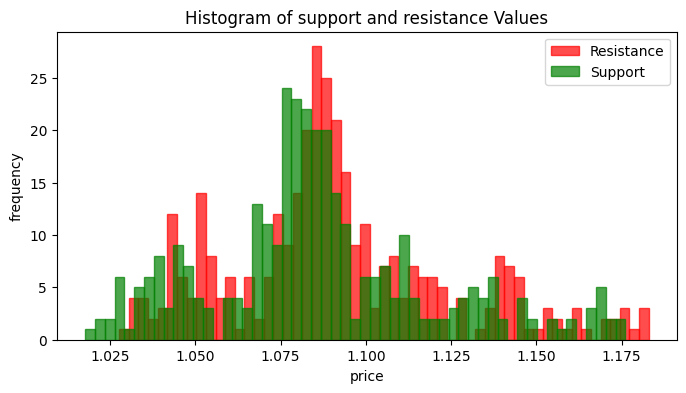

In [25]:
import matplotlib.pyplot as plt

df4highlow = df[:]

# فیلتر کردن دیتا فریم براساس مقادیر مدنظر
lowValues = df4highlow[df4highlow['pivot'] == 1]['low']
highValues = df4highlow[df4highlow['pivot'] == 2]['high']

binWidth = 0.003
bins = int((highValues.max() - lowValues.min()) / binWidth)

plt.figure(figsize=(8, 4))
plt.hist(highValues, bins=bins, alpha=0.7, label='Resistance', color='red', edgecolor='red')
plt.hist(lowValues, bins=bins, alpha=0.7, label='Support', color='green', edgecolor='green')
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Histogram of support and resistance Values')
plt.legend()